<a href="https://colab.research.google.com/github/Abhijeet141022/Quantum-Optimizing-Molecular-Structures-/blob/main/Hamiltonian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pulser

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import qutip

import pulser
from pulser import Pulse, Sequence, Register
from pulser_simulation import QutipEmulator
from pulser.devices import MockDevice
from pulser.waveforms import BlackmanWaveform

Length of result.expect: 3
Number of qubits: 3


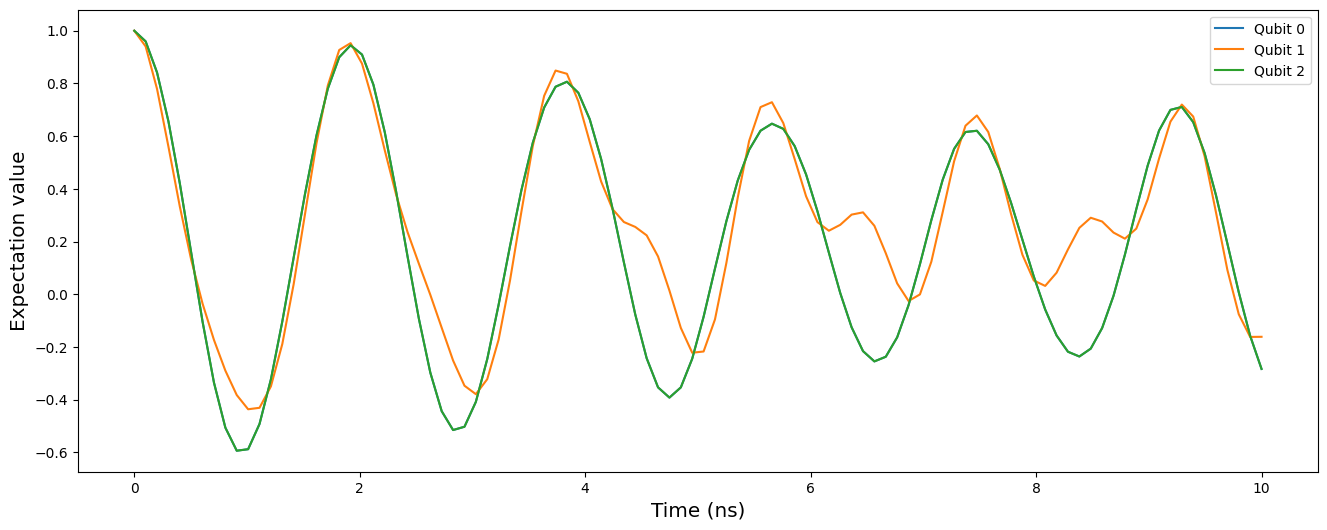

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def create_drift_hamiltonian(num_qubits):
    H_D = sum([qutip.tensor([qutip.sigmax() if i == j else qutip.qeye(2) for i in range(num_qubits)]) for j in range(num_qubits)])
    return H_D

def create_problem_hamiltonian(num_qubits, edges, J_ij, h_i):
    H_P = 0
    for (i, j) in edges:
        H_P += J_ij[(i, j)] * qutip.tensor([qutip.sigmaz() if k == i or k == j else qutip.qeye(2) for k in range(num_qubits)])
    for i in range(num_qubits):
        H_P += h_i[i] * qutip.tensor([qutip.sigmaz() if k == i else qutip.qeye(2) for k in range(num_qubits)])
    return H_P

def create_control_hamiltonian(num_qubits, edges, J):
    H_C = sum([J * qutip.tensor([qutip.sigmax() if k == i or k == j else qutip.qeye(2) for k in range(num_qubits)]) for (i, j) in edges])
    return H_C

# Example setup
num_qubits = 3
G = nx.path_graph(num_qubits)
edges = list(G.edges)
J_ij = {(i, j): 1.0 for (i, j) in edges}
h_i = [0.5] * num_qubits
J = 1.0

# Create Hamiltonians
H_D = create_drift_hamiltonian(num_qubits)
H_P = create_problem_hamiltonian(num_qubits, edges, J_ij, h_i)
H_C = create_control_hamiltonian(num_qubits, edges, J)

# Total Hamiltonian
H_total = H_D + H_P + H_C

# Define initial state (all qubits in |0>)
initial_state = qutip.tensor([qutip.basis(2, 0) for _ in range(num_qubits)])

# Define time evolution parameters
time_list = np.linspace(0, 10, 100)

# Define expectation operators (Pauli-Z for each qubit)
expect_ops = [qutip.tensor([qutip.sigmaz() if i == j else qutip.qeye(2) for i in range(num_qubits)]) for j in range(num_qubits)]

# Solve the Schrodinger equation
result = qutip.mesolve(H_total, initial_state, time_list, [], expect_ops)


print(f"Length of result.expect: {len(result.expect)}")
print(f"Number of qubits: {num_qubits}")


plt.figure(figsize=[16, 6])
for i in range(num_qubits):
    if i < len(result.expect):
        plt.plot(time_list, result.expect[i], label=f'Qubit {i}')
    else:
        print(f"Warning: Index {i} is out of range for result.expect")
plt.xlabel("Time (ns)", fontsize="x-large")
plt.ylabel("Expectation value", fontsize="x-large")
plt.legend()
plt.show()